# Project Concrete 

_Project Concrete_ aims to correlate, visualize and predict real estate prices based on the relationship between various
factors such as unemployment rate, disposable income and population growth in Austria.


Data Sources used for this endeavour - All datapoints are given for each district of Vienna
- [Unemployment Rates (Source: data.gv.at)](https://www.data.gv.at/katalog/dataset/CFE2FF7E9AD53C1EE053C630070AB105)
- [Net Income Vienna (Source: wien.gv.at)](https://www.wien.gv.at/statistik/bezirke/)
- [Population Growth (Source: wien.gv.at)](https://www.wien.gv.at/statistik/bevoelkerung/bevoelkerungsstand/index.html)
- [Real Estate Prices Vienna (Source: data.gv.at)](https://www.data.gv.at/katalog/dataset/kaufpreissammlung-liegenschaften-wien/resource/7b9bdd2d-2ff0-4e6e-bba5-21483d8cf55b)


Planned execution steps:
- Data aggregation and collection (see Planned Data Sources)
- Data preperation and import into MongoDB
- Analysis of data via Jupyter Notebook and MapReduce
- Presentation and visualization of results (i.e. map of Austria/Vienna, etc.)


### Install pymongo

In [6]:
!pip install pymongo
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install mrjob

### Connect to DB via connection string

In [142]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# Provide the mongodb atlas url to connect python to mongodb using pymongo
CONNECTION_STRING = "mongodb://127.0.0.1:27017"

# Create a connection using MongoClient
myclient = MongoClient(CONNECTION_STRING)

print("Connection Successful")

# Check DB 
for db in myclient.list_databases():
    print(db)

Connection Successful
{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'config', 'sizeOnDisk': 110592, 'empty': False}
{'name': 'immodb', 'sizeOnDisk': 10592256, 'empty': False}
{'name': 'local', 'sizeOnDisk': 73728, 'empty': False}


## Importing the data
First of all, we have to import all of the data files into a proper dataframe, this is for easy insertion into the DB later

For this step we use the Pandas read_csv function, for more info on the exact data format consult the Data Sources section

### Unemployment Data CSV from 2002


In [8]:
unemploy_df = pd.read_csv('emp-bez-alp.csv', sep = ";", decimal=',', thousands =".")
unemploy_df

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_DATE,REF_YEAR,ALP_TOT_VALUE,ALP_MAL_VALUE,ALP_FEM_VALUE,ALP_TOT_DENSITY,ALP_MAL_DENSITY,ALP_FEM_DENSITY
0,AT1,AT13,AT130,90000,90000,20020101,2002,74894,44966,29928,68.5,83.5,54.0
1,AT1,AT13,AT130,90100,90100,20020101,2002,433,232,201,35.4,19.0,16.5
2,AT1,AT13,AT130,90200,90200,20020101,2002,4784,2933,1851,77.7,47.6,30.1
3,AT1,AT13,AT130,90300,90300,20020101,2002,3957,2403,1554,68.7,41.7,27.0
4,AT1,AT13,AT130,90400,90400,20020101,2002,1140,668,472,56.6,33.1,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,AT1,AT13,AT130,91900,91900,20190101,2019,3850,2091,1759,82.6,44.9,37.8
428,AT1,AT13,AT130,92000,92000,20190101,2019,8750,4976,3774,143.9,81.8,62.1
429,AT1,AT13,AT130,92100,92100,20190101,2019,12823,6943,5880,115.6,62.6,53.0
430,AT1,AT13,AT130,92200,92200,20190101,2019,11762,6006,5756,90.6,46.2,44.3


### Population Growth Data in Vienna from 2002


In [9]:
pop_growth_df = pd.read_csv('tab_5.1.2_bevoelkerungsstandund-veraenderung_.csv', sep = ";", decimal='.', encoding='utf-8')
pop_growth_df

,Jahr,Wien,1. Innere Stadt,2. Leopoldstadt,3. Landstrasse,4. Wieden,5. Margareten,6. Mariahilf,7. Neubau,8. Josefstadt,...,14. Penzing,15. Rudolfsheim-Fuenfhaus,16. Ottakring,17. Hernals,18. Waehring,19. Doebling,20. Brigittenau,21. Floridsdorf,22. Donaustadt,23. Liesing
0,2002,1571123,17630,89016,82227,28975,49785,28525,28912,22219,...,79142,67482,87914,48827,45505,65327,76837,129726,138100,85791
1,2003,1592846,17541,89954,82297,29348,50367,28805,28968,23156,...,80185,67976,89153,49428,45872,66017,78792,131892,140404,86486
2,2004,1610410,17384,90837,83019,29394,51098,28891,29012,23309,...,80505,68760,89822,50278,46309,66437,79441,133801,142620,87080
3,2005,1632569,17294,91364,83827,29573,51882,29012,29161,23588,...,81785,69467,91997,51316,46921,66900,80758,134904,144820,87716
4,2006,1652449,17285,92170,84208,30126,52534,29369,30416,23597,...,82829,70235,93817,52480,47291,67389,81288,136625,146892,89078
5,2007,1661246,17147,93313,83919,30189,52286,29463,29955,23613,...,83246,70228,93877,52626,47333,67832,81719,137335,149083,90291
6,2008,1671221,16976,93463,83050,30262,52434,29430,30054,23703,...,83751,70291,94193,52414,47478,67961,81648,138678,150967,91192
7,2009,1680135,16623,93822,82979,30348,52288,29197,29878,23639,...,83980,70600,94526,52253,47619,67837,81986,139498,153148,91623
8,2010,1689995,16525,94735,83061,30331,52354,29323,30069,23435,...,84090,70830,94816,52328,47693,67865,82083,140647,155527,92252
9,2011,1702855,16385,95302,83955,30541,52753,29308,30062,23379,...,84566,71491,94951,52293,47575,68079,82969,142199,158417,93374


### Real Estate Purchase list from 1990 (Kaufpreissammlung Liegenschaften Wien)


In [10]:
real_estate_vienna_df = pd.read_csv('kaufpreissammlung-liegenschaften.csv', sep = ";", decimal=',', encoding='latin-1', low_memory=False)
real_estate_vienna_df

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
0,1617,Strebersdorf,1417.0,1210.0,Mühlweg,13,752/16,755.0,Kaufvertrag,13.10.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,750000.0,NaN
1,1607,Groß Jedlersdorf II,193.0,1210.0,Bahnsteggasse,4,408,510.0,Kaufvertrag,13.09.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1250000.0,NaN
2,1209,Ober St.Veit,3570.0,1130.0,Jennerplatz,34/20,938/3,456.0,Kaufvertrag,10.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,480000.0,NaN
3,1207,Lainz,405.0,1130.0,Sebastian-Brunner-Gasse,6,8/23,523.0,Kaufvertrag,30.12.2020,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1600000.0,NaN
4,1101,Favoriten,3831.0,1100.0,Laxenburger Straße,2C -2 D,2044/19,12768.0,Kaufvertrag,04.11.2020,...,FALSCH,30.0,FALSCH,NaN,NaN,FALSCH,"W V 22 g , Wi g","40 ,30",15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57907,1204,Hadersdorf,1057.0,1140.0,Laskywiesengasse,10,889,1313.0,Kaufvertrag,18.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,950000.0,NaN
57908,1204,Hadersdorf,1200.0,1140.0,Robert-Fuchs-Gasse,25-31,448,4003.0,Kaufvertrag,05.12.2018,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,5200000.0,NaN
57909,1206,Hütteldorf,2760.0,1140.0,Ulmenstraße,48,1232/1,499.0,Kaufvertrag,15.06.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,699000.0,NaN
57910,1216,Weidlingau,5.0,1140.0,Hauptstraße,114,11/2,1649.0,Kaufvertrag,26.07.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1496000.0,NaN


### Net Income Data in Vienna from 2002

In [11]:
net_income_vienna_df = pd.read_csv('vie-bez-biz-ecn-inc-sex-2002f.csv', sep=';', decimal=',')
net_income_vienna_df

,NUTS,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,INC_TOT_VALUE,INC_MAL_VALUE,INC_FEM_VALUE
0,AT13,90000,90000,2002,20021231,18.217,20.709,15.424
1,AT13,90100,90100,2002,20021231,25.463,31.961,18.536
2,AT13,90200,90200,2002,20021231,16.439,18.301,14.282
3,AT13,90300,90300,2002,20021231,18.701,21.444,15.804
4,AT13,90400,90400,2002,20021231,20.325,23.641,16.876
...,...,...,...,...,...,...,...,...
451,AT13,91900,91900,2020,20201231,29.195,34.102,24.257
452,AT13,92000,92000,2020,20201231,20.671,21.591,19.531
453,AT13,92100,92100,2020,20201231,24.061,26.202,21.693
454,AT13,92200,92200,2020,20201231,26.272,29.302,23.100


### Create collection
In the next step, we insert our dataframes into our permanent data store of choice, MongoDB

In [24]:
# In MongoDB collections and DBs are only created on first insert (reminiscent of Git folders)
db = myclient["immodb"]

# We insert the whole dateframes into the DB

# Insert unemploymentData
db.unemploymentData.insert_many(unemploy_df.to_dict('records'))
# Insert populationGrowth
db.populationGrowth.insert_many(pop_growth_df.to_dict('records'))
# Insert realEstateVienna
db.realEstateVienna.insert_many(real_estate_vienna_df.to_dict('records'))
# Insert netIncomeVienna
db.netIncomeVienna.insert_many(net_income_vienna_df.to_dict('records'))

# Check if colletions have been created
print(db.list_collection_names())

['netIncomeVienna', 'populationGrowth', 'unemploymentData', 'realEstateVienna']


Now for sanity checking, we can output the rowcount of our MongoDB collections!

In [23]:
db = myclient["immodb"]
unemp_col = db["unemploymentData"]
populationGrowth_col = db["populationGrowth"]
realEstateVienna_col = db["realEstateVienna"]
netIncomeVienna_col = db["netIncomeVienna"]

data = [(unemp_col.find(), 'Unemployment Data'), (populationGrowth_col.find(), 'Population Growth'), (realEstateVienna_col.find(), 'Real Estate Sales'), (netIncomeVienna_col.find(), 'Net Income')]
for (cur, title) in data:
    print(title, '\nRow Count: ', len(list(cur)))

Unemployment Data 
Row Count:  0
Population Growth 
Row Count:  0
Real Estate Sales 
Row Count:  0
Net Income 
Row Count:  0


And we can also drop all of our data, i.e. in case something about our sources changes

In [22]:
# Drop all collections
# db["unemploymentData"].drop()
# db["populationGrowth"].drop()
# db["realEstateVienna"].drop()
# db["netIncomeVienna"].drop()

### Load from database
In this step, we read in all of our data from the MongoDB into Pandas dataframes!

#### Unemployment Data

In [25]:
unemployment_fromDb = pd.DataFrame(list(unemp_col.find()))
unemployment_fromDb = unemployment_fromDb.set_index("_id")
unemployment_fromDb

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_DATE,REF_YEAR,ALP_TOT_VALUE,ALP_MAL_VALUE,ALP_FEM_VALUE,ALP_TOT_DENSITY,ALP_MAL_DENSITY,ALP_FEM_DENSITY
_id,,,,,,,,,,,,,
6267d7e18395b2d4e5640e49,AT1,AT13,AT130,90000,90000,20020101,2002,74894,44966,29928,68.5,83.5,54.0
6267d7e18395b2d4e5640e4a,AT1,AT13,AT130,90100,90100,20020101,2002,433,232,201,35.4,19.0,16.5
6267d7e18395b2d4e5640e4b,AT1,AT13,AT130,90200,90200,20020101,2002,4784,2933,1851,77.7,47.6,30.1
6267d7e18395b2d4e5640e4c,AT1,AT13,AT130,90300,90300,20020101,2002,3957,2403,1554,68.7,41.7,27.0
6267d7e18395b2d4e5640e4d,AT1,AT13,AT130,90400,90400,20020101,2002,1140,668,472,56.6,33.1,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267d7e18395b2d4e5640ff4,AT1,AT13,AT130,91900,91900,20190101,2019,3850,2091,1759,82.6,44.9,37.8
6267d7e18395b2d4e5640ff5,AT1,AT13,AT130,92000,92000,20190101,2019,8750,4976,3774,143.9,81.8,62.1
6267d7e18395b2d4e5640ff6,AT1,AT13,AT130,92100,92100,20190101,2019,12823,6943,5880,115.6,62.6,53.0


#### Population Growth in Vienna

In [26]:
populationGrowth_fromDb = pd.DataFrame(list(populationGrowth_col.find()))
populationGrowth_fromDb = populationGrowth_fromDb.set_index("_id")
populationGrowth_fromDb

,Jahr,Wien,1. Innere Stadt,2. Leopoldstadt,3. Landstrasse,4. Wieden,5. Margareten,6. Mariahilf,7. Neubau,8. Josefstadt,...,14. Penzing,15. Rudolfsheim-Fuenfhaus,16. Ottakring,17. Hernals,18. Waehring,19. Doebling,20. Brigittenau,21. Floridsdorf,22. Donaustadt,23. Liesing
_id,,,,,,,,,,,,,,,,,,,,,
6267d7e18395b2d4e5640ff9,2002,1571123,17630,89016,82227,28975,49785,28525,28912,22219,...,79142,67482,87914,48827,45505,65327,76837,129726,138100,85791
6267d7e18395b2d4e5640ffa,2003,1592846,17541,89954,82297,29348,50367,28805,28968,23156,...,80185,67976,89153,49428,45872,66017,78792,131892,140404,86486
6267d7e18395b2d4e5640ffb,2004,1610410,17384,90837,83019,29394,51098,28891,29012,23309,...,80505,68760,89822,50278,46309,66437,79441,133801,142620,87080
6267d7e18395b2d4e5640ffc,2005,1632569,17294,91364,83827,29573,51882,29012,29161,23588,...,81785,69467,91997,51316,46921,66900,80758,134904,144820,87716
6267d7e18395b2d4e5640ffd,2006,1652449,17285,92170,84208,30126,52534,29369,30416,23597,...,82829,70235,93817,52480,47291,67389,81288,136625,146892,89078
6267d7e18395b2d4e5640ffe,2007,1661246,17147,93313,83919,30189,52286,29463,29955,23613,...,83246,70228,93877,52626,47333,67832,81719,137335,149083,90291
6267d7e18395b2d4e5640fff,2008,1671221,16976,93463,83050,30262,52434,29430,30054,23703,...,83751,70291,94193,52414,47478,67961,81648,138678,150967,91192
6267d7e18395b2d4e5641000,2009,1680135,16623,93822,82979,30348,52288,29197,29878,23639,...,83980,70600,94526,52253,47619,67837,81986,139498,153148,91623
6267d7e18395b2d4e5641001,2010,1689995,16525,94735,83061,30331,52354,29323,30069,23435,...,84090,70830,94816,52328,47693,67865,82083,140647,155527,92252


#### Real Estate Purchase List Vienna


In [27]:
realEstateVienna_fromDb = pd.DataFrame(list(realEstateVienna_col.find()))
realEstateVienna_fromDb = realEstateVienna_fromDb.set_index("_id")
realEstateVienna_fromDb

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
_id,,,,,,,,,,,,,,,,,,,,,
6267d7e68395b2d4e564100c,1617,Strebersdorf,1417.0,1210.0,Mühlweg,13,752/16,755.0,Kaufvertrag,13.10.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,750000.0,NaN
6267d7e68395b2d4e564100d,1607,Groß Jedlersdorf II,193.0,1210.0,Bahnsteggasse,4,408,510.0,Kaufvertrag,13.09.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1250000.0,NaN
6267d7e68395b2d4e564100e,1209,Ober St.Veit,3570.0,1130.0,Jennerplatz,34/20,938/3,456.0,Kaufvertrag,10.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,480000.0,NaN
6267d7e68395b2d4e564100f,1207,Lainz,405.0,1130.0,Sebastian-Brunner-Gasse,6,8/23,523.0,Kaufvertrag,30.12.2020,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1600000.0,NaN
6267d7e68395b2d4e5641010,1101,Favoriten,3831.0,1100.0,Laxenburger Straße,2C -2 D,2044/19,12768.0,Kaufvertrag,04.11.2020,...,FALSCH,30.0,FALSCH,NaN,NaN,FALSCH,"W V 22 g , Wi g","40 ,30",15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267d7e78395b2d4e564f23f,1204,Hadersdorf,1057.0,1140.0,Laskywiesengasse,10,889,1313.0,Kaufvertrag,18.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,950000.0,NaN
6267d7e78395b2d4e564f240,1204,Hadersdorf,1200.0,1140.0,Robert-Fuchs-Gasse,25-31,448,4003.0,Kaufvertrag,05.12.2018,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,5200000.0,NaN
6267d7e78395b2d4e564f241,1206,Hütteldorf,2760.0,1140.0,Ulmenstraße,48,1232/1,499.0,Kaufvertrag,15.06.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,699000.0,NaN


### Cleaning Real Estate Price List
For this particular dataframe we need to take extra care, removing NaN values in the columns we're interested in! 

In [28]:
# Clean out NaN values for purchasing date and purchasing price
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['ber. Kaufpreis'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['Erwerbsdatum'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['/m² Gfl.'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[realEstateVienna_fromDb['/m² Gfl.'] > 0]

# Sort by date, time series
realEstateVienna_fromDb.sort_values("Erwerbsdatum")

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
_id,,,,,,,,,,,,,,,,,,,,,
6267d7e68395b2d4e56436df,1654,Eßling,4521.0,1220.0,Telephonweg,westl.,447,10000.0,Kaufvertrag,01.01.1990,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,87207.0,NaN
6267d7e78395b2d4e56486c9,1613,Leopoldau,58.0,1210.0,Oskar-Grissemann-Straße,55,2337/1,7.0,Magistratsbeschluss,01.01.2006,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1960.0,NaN
6267d7e68395b2d4e5641553,1803,Inzersdorf,4013.0,1230.0,SLAMASTRASSE,NaN,1568/26,1757.0,Kaufvertrag,01.02.1985,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,86827.0,NaN
6267d7e68395b2d4e56417fb,1660,Kagran,2565.0,1220.0,WAGRAMER STRASSE,208,1262/15,73.0,Kaufvertrag,01.02.1988,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,3714.0,NaN
6267d7e68395b2d4e56417fc,1660,Kagran,2565.0,1220.0,WAGRAMER STRASSE,208,166/32,8.0,Kaufvertrag,01.02.1988,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,757.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267d7e68395b2d4e56444cc,1210,Penzing,519.0,1140.0,LINZER STRASSE,195,314/3,46.0,Kaufvertrag,31.12.1992,...,WAHR,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,13372.0,NaN
6267d7e78395b2d4e56460c0,1006,Landstraße,2018.0,1030.0,Schnirchgasse,hinter 16-24,2327/1,2938.0,Kaufvertrag,31.12.1997,...,FALSCH,40.0,FALSCH,NaN,NaN,FALSCH,VB,60,1380784.0,NaN
6267d7e78395b2d4e5645c3d,1401,Dornbach,2667.0,1170.0,Kleegasse,20,637/20,1.0,Magistratsbeschluss,31.12.1997,...,WAHR,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,327.0,NaN


# Data Analysis
In this step, we analyze our dataframes in the aspects of... BLABLABLA TODO: STORY HIER!

## Example 2nd District, Leopoldstadt
We model our analysis of a district based on an example first, the 2nd district 

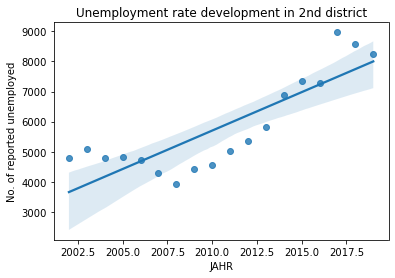

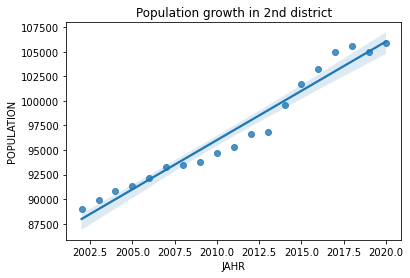

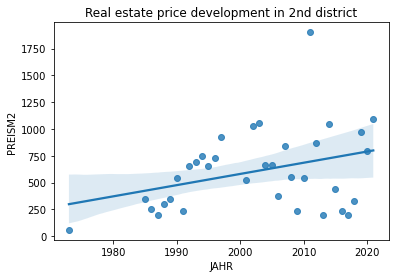

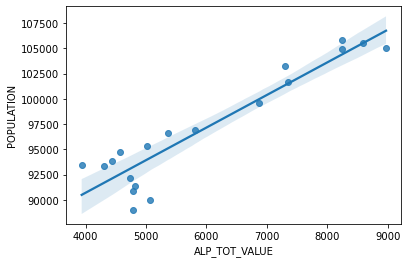

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot unemployment
unemp_2nd_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == 90200]
unemp_2nd_dist = unemp_2nd_dist.astype({'ALP_TOT_VALUE': 'float32'})
unemp_2nd_dist

sns.regplot(x = "REF_YEAR", 
            y = "ALP_TOT_VALUE", 
            data = unemp_2nd_dist).set(xlabel='JAHR', ylabel='No. of reported unemployed', title='Unemployment rate development in 2nd district')
plt.show()

# Plot population 
population_2nd_dist = populationGrowth_fromDb[['Jahr', '2. Leopoldstadt']]
population_2nd_dist.columns = ['JAHR', 'POPULATION']

sns.regplot(x = "JAHR", 
            y = "POPULATION", 
            data = population_2nd_dist).set(title='Population growth in 2nd district')
plt.show()

# Plot real estate sold 
realEstate_2nd_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == 1020]
realEstate_2nd_dist['/m² Gfl.']
realEstate_2nd_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_2nd_dist['Erwerbsdatum'], format = '%d.%m.%Y')
realEstate_2nd_dist['Erwerbsdatum'] = realEstate_2nd_dist['Erwerbsdatum'].dt.year

# Aggregate to median per year 
realEstate_2nd_dist = realEstate_2nd_dist[['Erwerbsdatum','/m² Gfl.']]
realEstate_2nd_dist.columns = ['JAHR', 'PREISM2']
realEstate_2nd_dist = realEstate_2nd_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()

sns.regplot(x = "JAHR", 
            y = "PREISM2", 
            data = realEstate_2nd_dist).set(title='Real estate price development in 2nd district')
plt.show()

# Set index of time series to year for correlation
population_2nd_dist.set_index('JAHR', inplace=True)
unemp_2nd_dist.set_index('REF_YEAR', inplace=True)

# Correlation  
merged = pd.merge_asof(population_2nd_dist, unemp_2nd_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "POPULATION", 
            data = merged)
plt.show()

## All Districts
Now we analyze all the districts

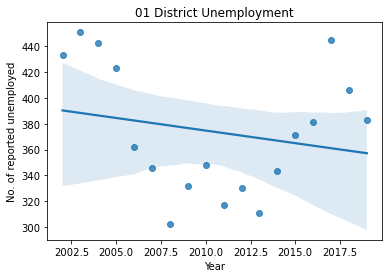

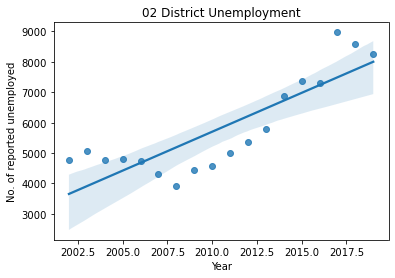

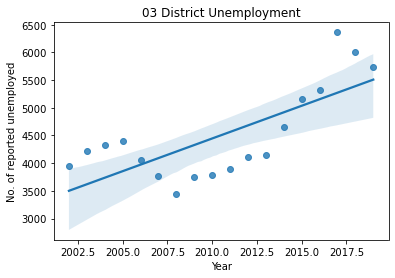

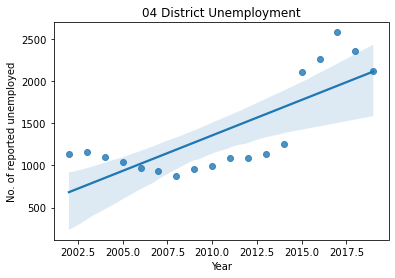

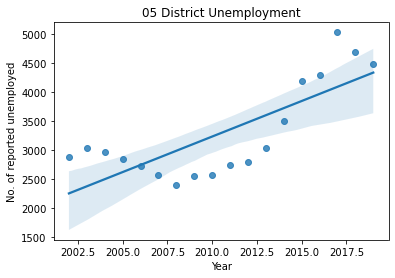

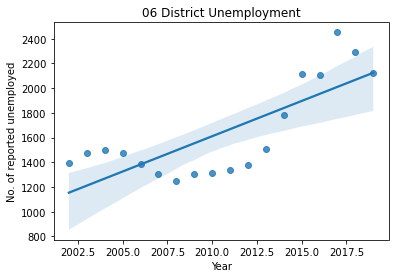

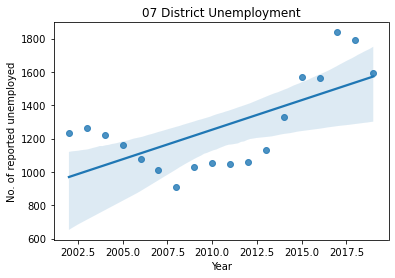

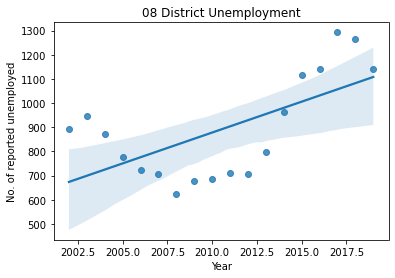

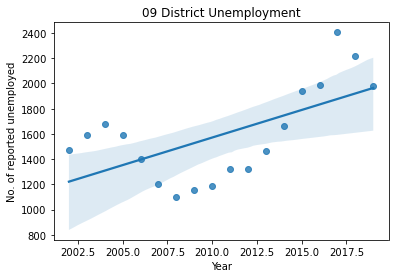

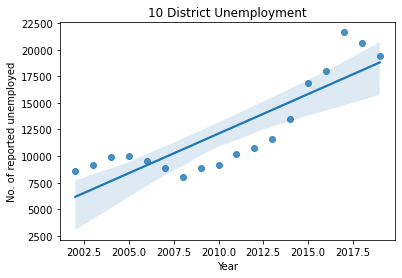

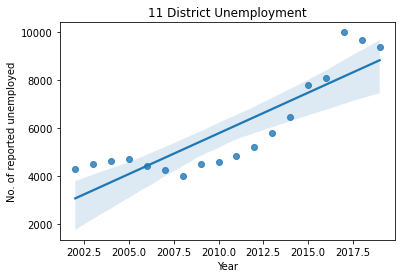

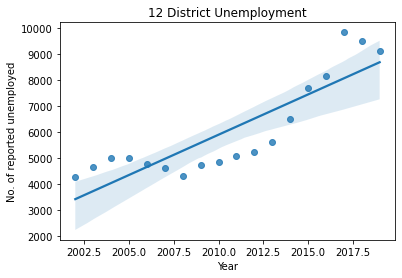

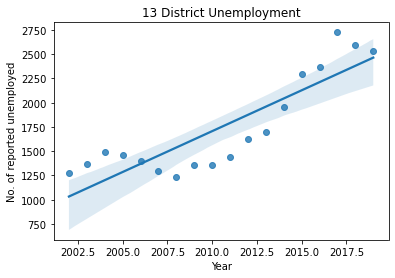

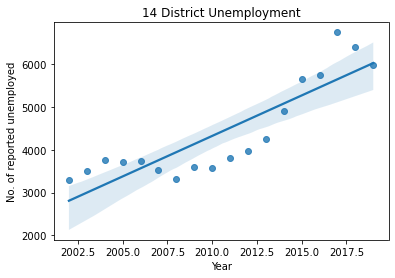

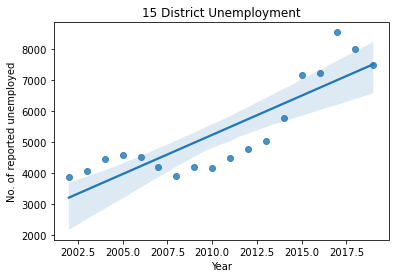

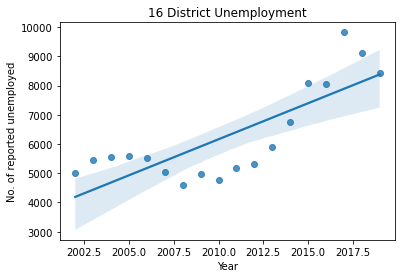

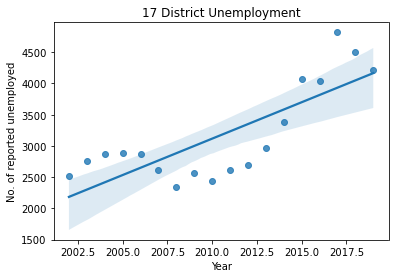

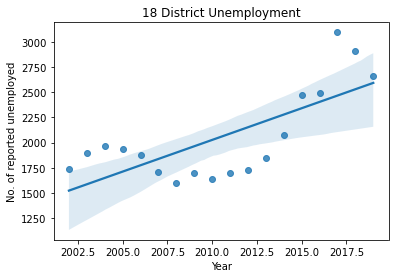

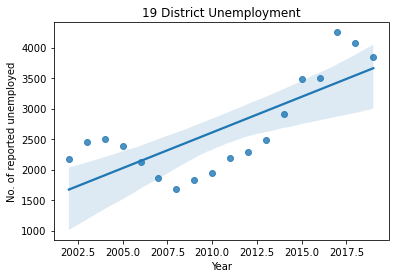

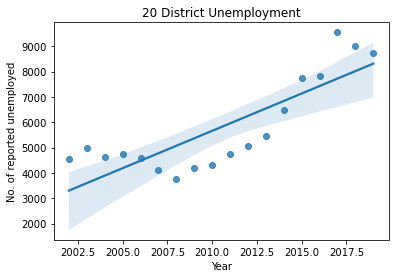

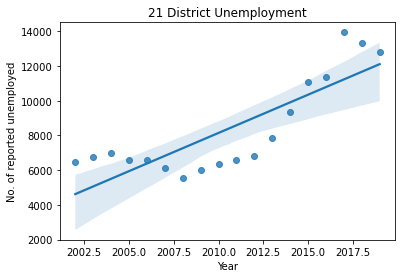

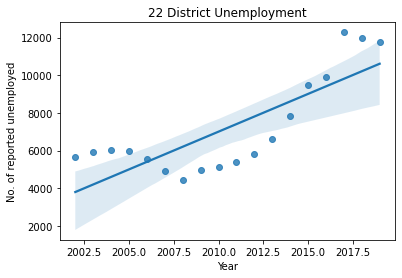

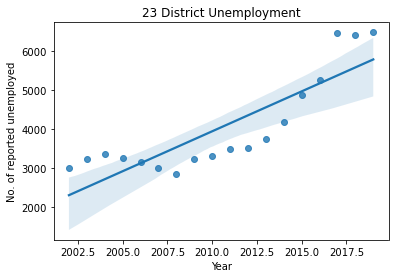

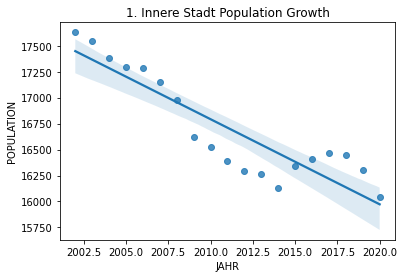

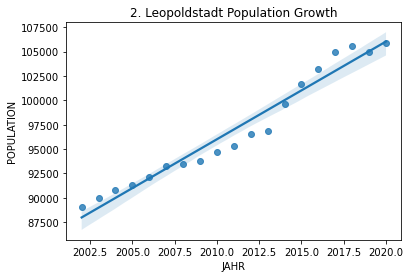

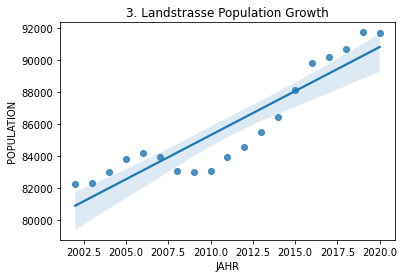

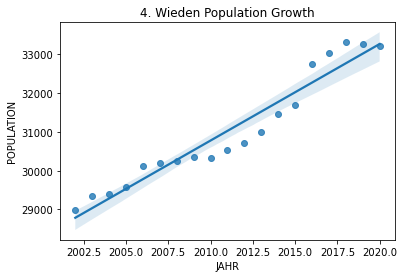

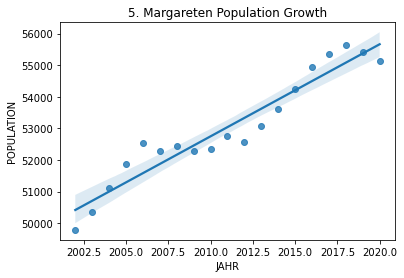

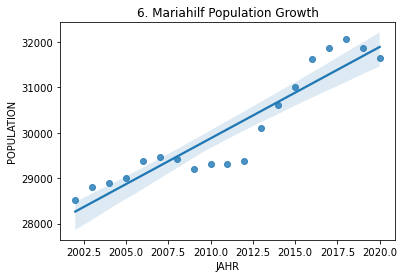

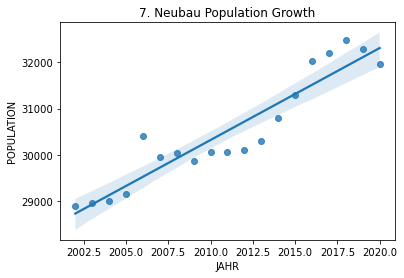

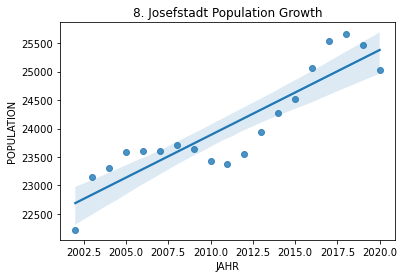

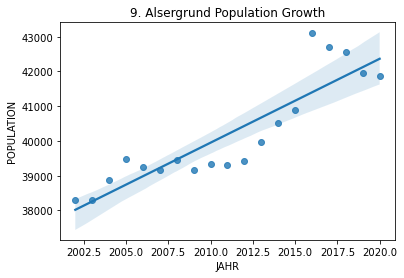

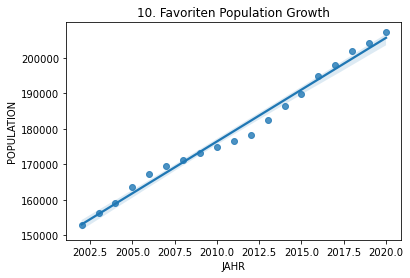

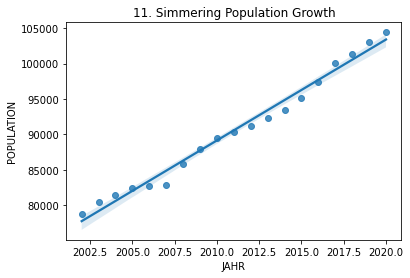

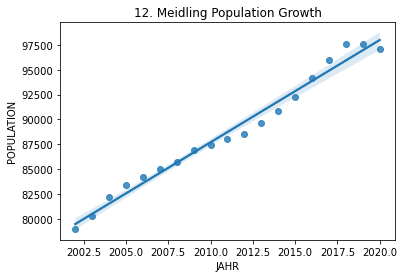

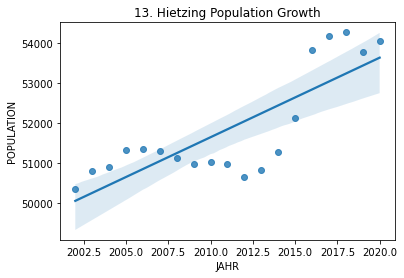

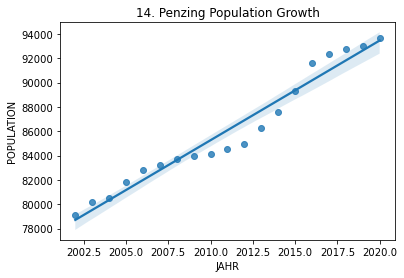

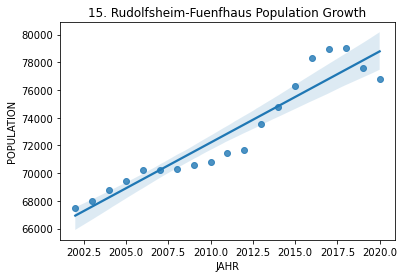

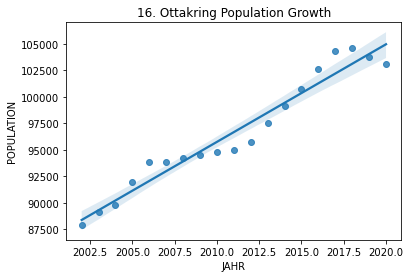

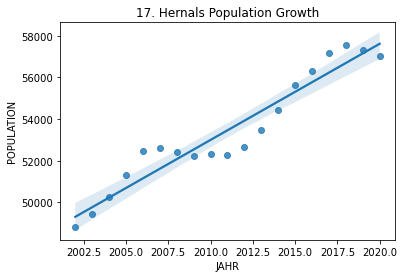

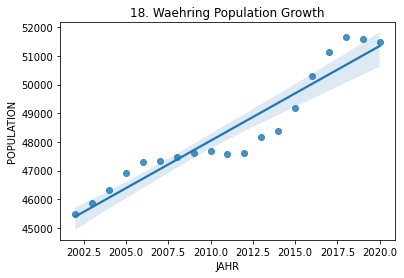

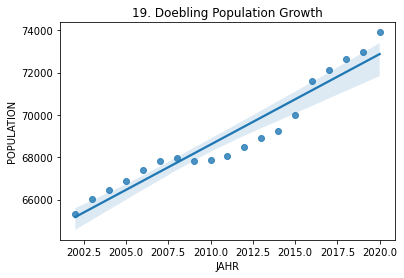

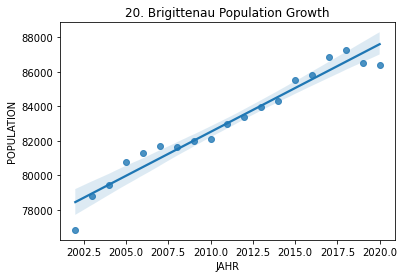

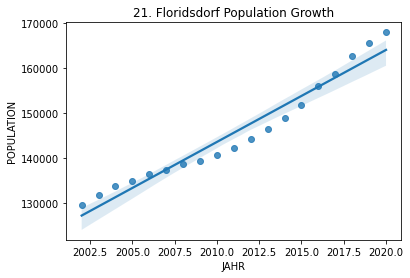

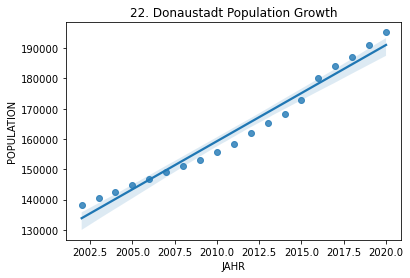

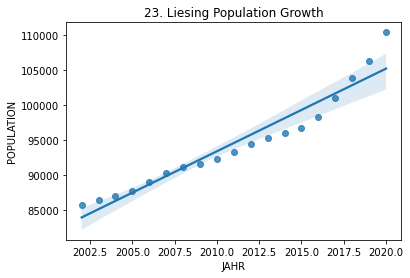

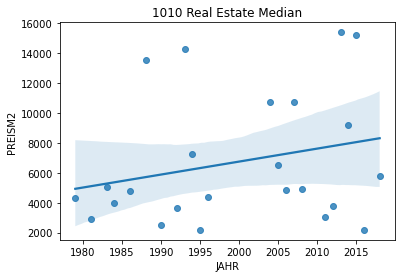

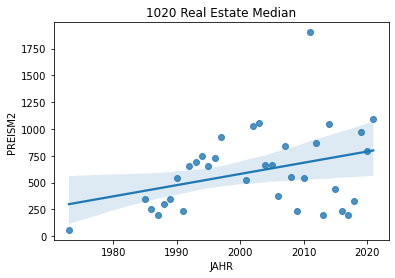

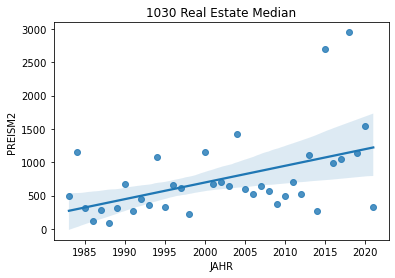

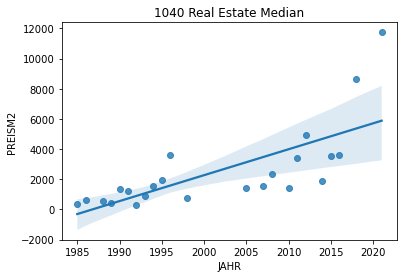

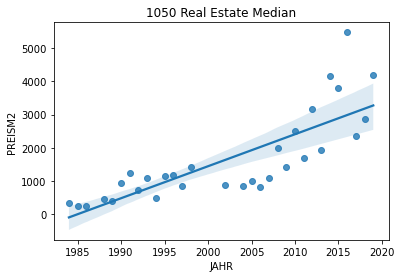

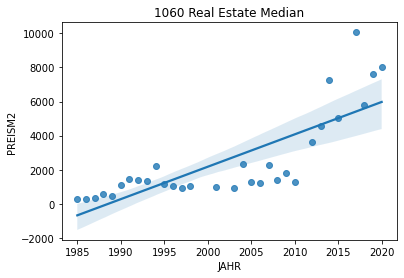

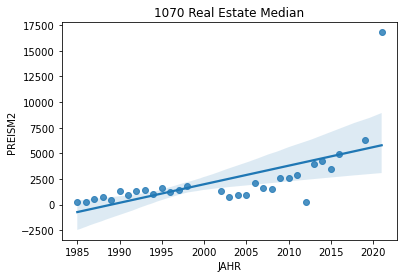

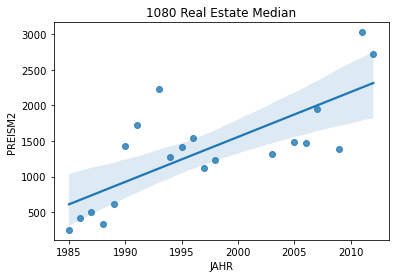

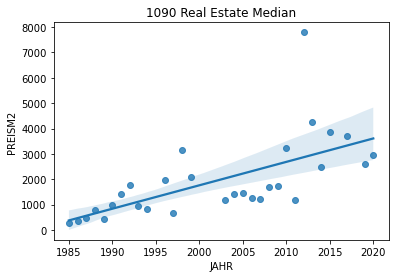

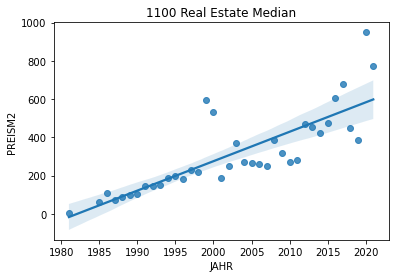

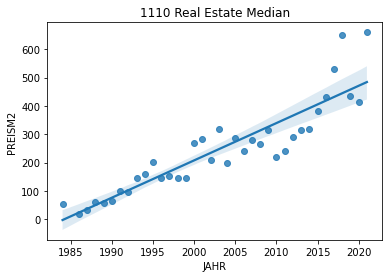

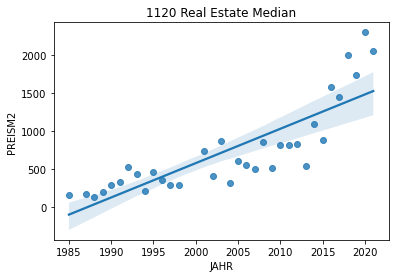

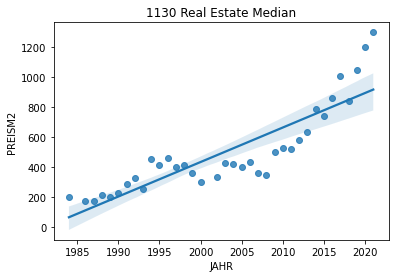

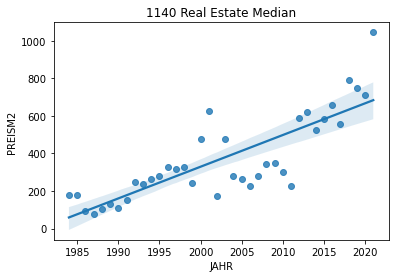

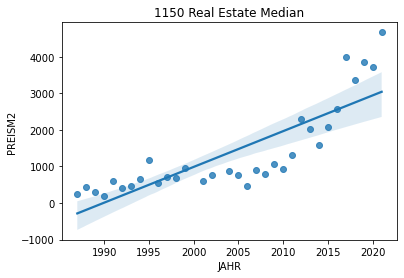

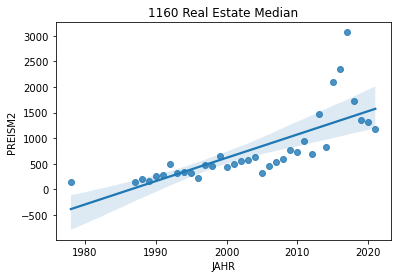

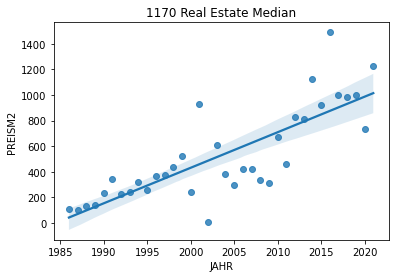

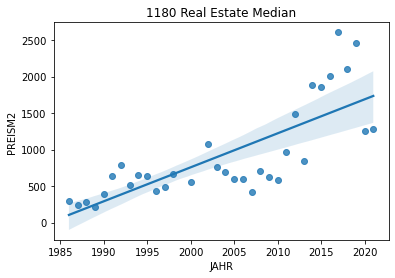

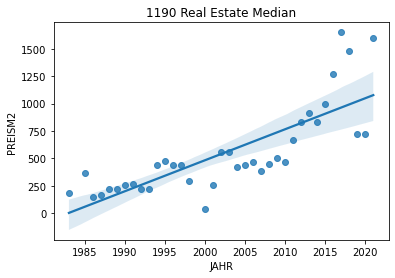

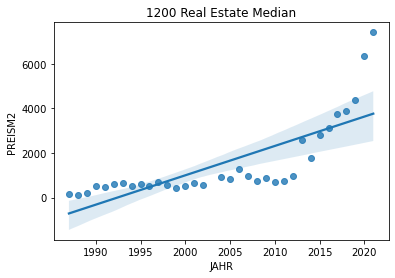

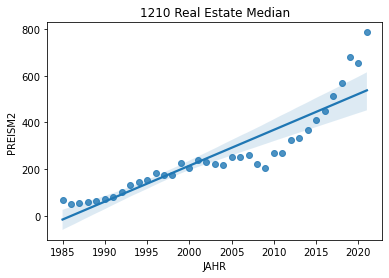

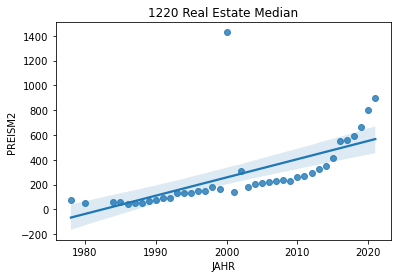

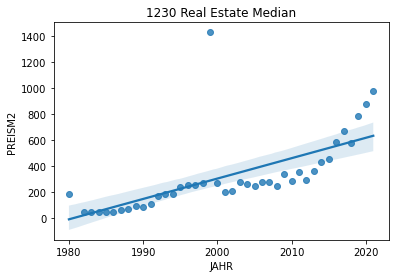

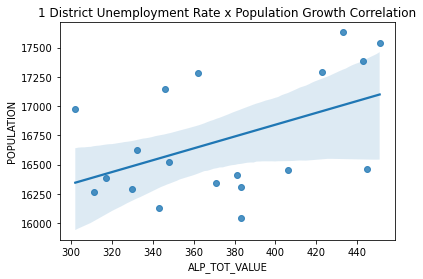

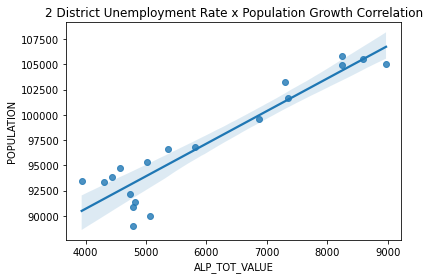

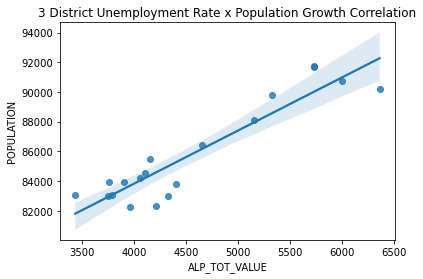

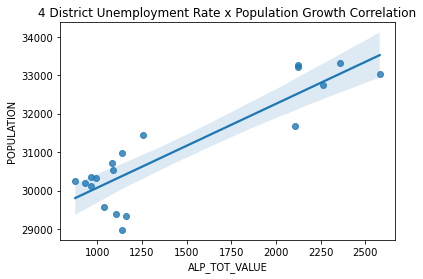

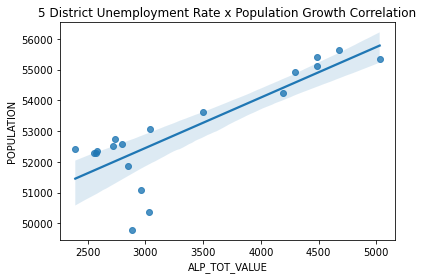

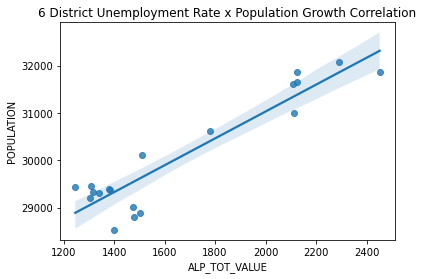

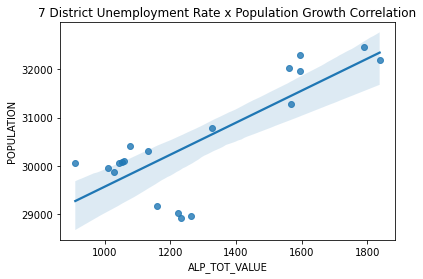

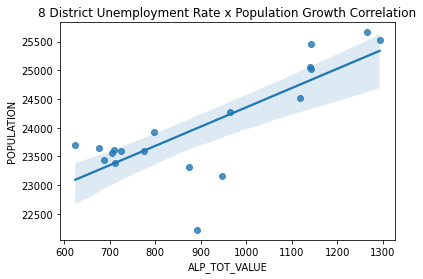

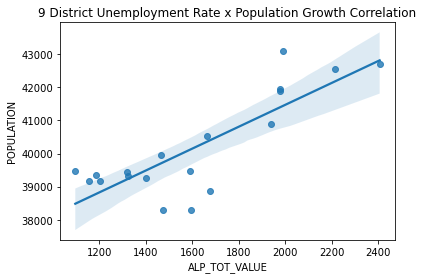

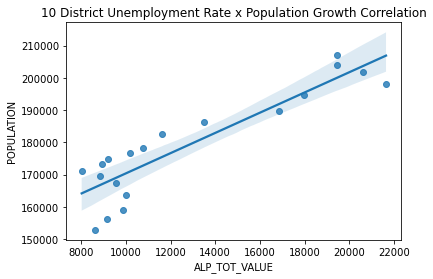

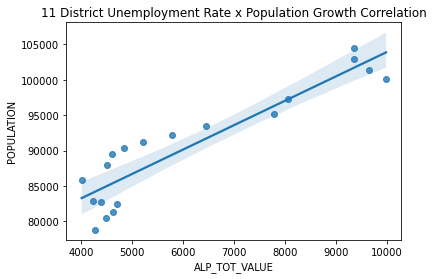

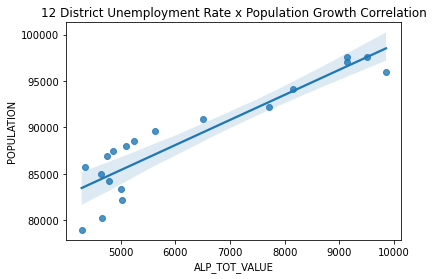

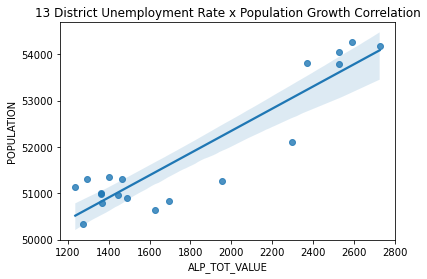

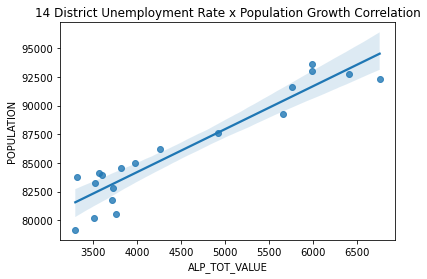

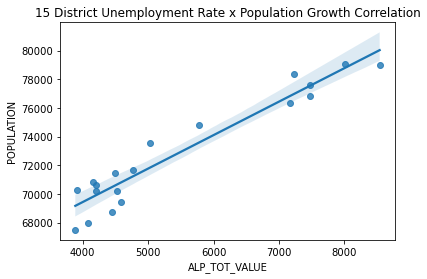

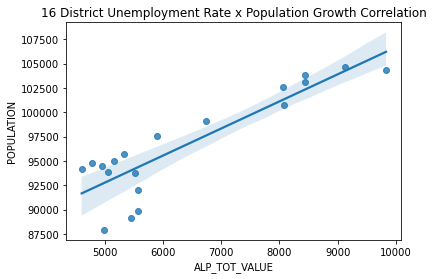

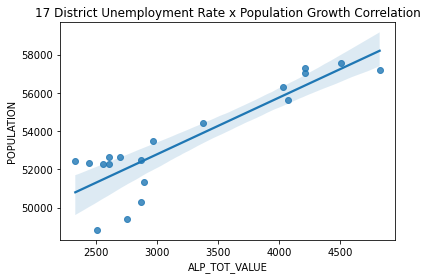

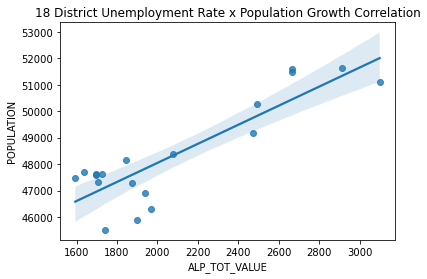

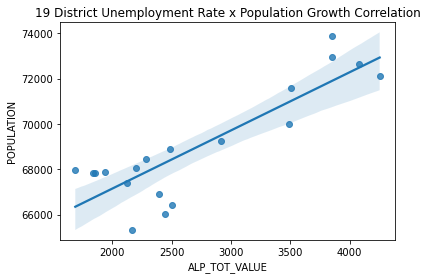

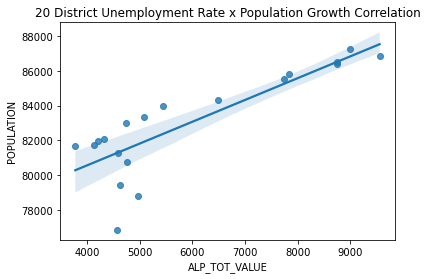

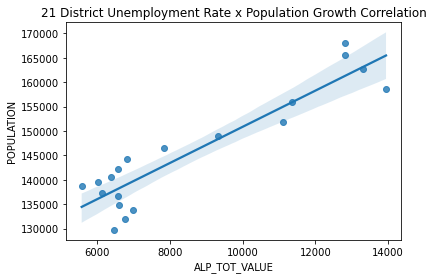

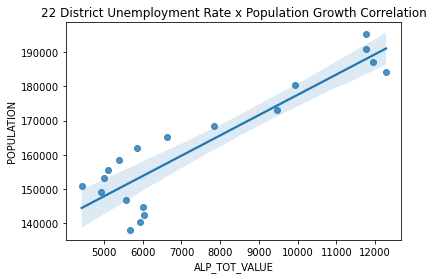

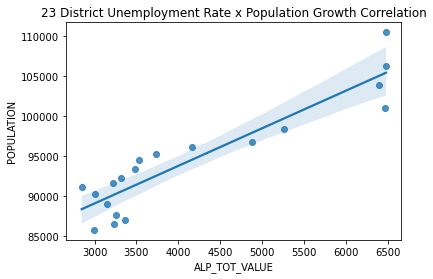

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot unemployment
unemployment = [0] * 23
i = 0
districts_unemp = [90100, 90200, 90300, 90400, 90500, 90600, 90700, 90800, 90900, 91000, 91100, 91200, 91300, 91400, 91500, 91600, 91700, 91800, 91900, 92000, 92100, 92200, 92300]
for plz in districts_unemp:
    unemp_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == plz]
    unemployment[i] = unemp_dist
    i += 1
    
    sns.regplot(x = "REF_YEAR", 
                y = "ALP_TOT_VALUE", 
                data = unemp_dist).set(xlabel='Year', ylabel='No. of reported unemployed', title=str(plz)[1:3] + ' District Unemployment')
    plt.show()
    

# Plot population 
population = [0] * 23
i = 0
districts_pop = ['1. Innere Stadt','2. Leopoldstadt','3. Landstrasse','4. Wieden','5. Margareten','6. Mariahilf','7. Neubau','8. Josefstadt','9. Alsergrund','10. Favoriten','11. Simmering','12. Meidling','13. Hietzing','14. Penzing','15. Rudolfsheim-Fuenfhaus','16. Ottakring','17. Hernals','18. Waehring','19. Doebling','20. Brigittenau','21. Floridsdorf','22. Donaustadt','23. Liesing']
for district in districts_pop:
    population_dist = populationGrowth_fromDb[['Jahr', district]]
    population_dist.columns = ['JAHR', 'POPULATION']
    population[i] = population_dist
    i += 1

    sns.regplot(x = "JAHR", 
                y = "POPULATION", 
                data = population_dist).set(title=district +' Population Growth')
    plt.show()

# Plot real estate sold 
districts_realEstate = [1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230]
for plz in districts_realEstate:
    realEstate_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == plz]
    realEstate_dist['/m² Gfl.']
    realEstate_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_dist['Erwerbsdatum'], format = '%d.%m.%Y')
    realEstate_dist['Erwerbsdatum'] = realEstate_dist['Erwerbsdatum'].dt.year

    # Aggregate to median per year 
    realEstate_dist = realEstate_dist[['Erwerbsdatum','/m² Gfl.']]
    realEstate_dist.columns = ['JAHR', 'PREISM2']
    realEstate_dist = realEstate_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()

    sns.regplot(x = "JAHR", 
                y = "PREISM2", 
                data = realEstate_dist).set(title=str(plz) + ' Real Estate Median')
    plt.show()

for i in range(0,23):
    # Set index of time series to year for correlation
    population[i].set_index('JAHR', inplace=True)
    unemployment[i].set_index('REF_YEAR', inplace=True)

    # Correlation graph
    merged = pd.merge_asof(population[i], unemployment[i], left_index=True, right_index=True, direction='nearest')
    merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
    merged.corr()

    sns.regplot(x = "ALP_TOT_VALUE", 
                y = "POPULATION", 
                data = merged).set(title=str(i+1) + ' District Unemployment Rate x Population Growth Correlation')
    plt.show()

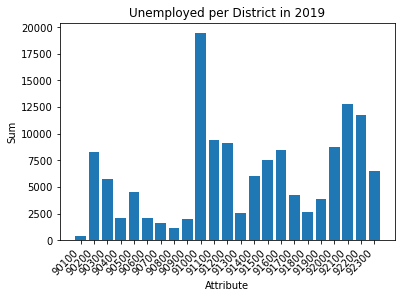

In [158]:
def flatten(t):
    return [item for sublist in t for item in sublist]

attributes = ['90100', '90200', '90300', '90400', '90500', '90600', '90700', '90800', '90900', '91000', '91100', '91200', '91300', '91400', '91500', '91600', '91700', '91800', '91900', '92000', '92100', '92200', '92300']
column_totals = [0] * 23
i = 0
for plz in attributes:
    # unemp_dist = unemployment_fromDb["ALP_TOT_VALUE"].where(unemployment_fromDb['DISTRICT_CODE'] == plz)
    unemp_dist = unemployment_fromDb[(unemployment_fromDb.DISTRICT_CODE == int(plz)) & (unemployment_fromDb.REF_YEAR == 2019)]
    unemp_dist = unemp_dist["ALP_TOT_VALUE"]
    column_totals[i] = unemp_dist
    i += 1

column_totals = flatten(column_totals)

plt.bar(attributes, column_totals)
plt.title('Unemployed per District in 2019')
plt.xlabel('Attribute')
plt.ylabel('Sum')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## MapReduce: Correlation analysis 
In this step of our analysis, we are going to calculate the Pearson, Spearman and Kendall correlation coefficients between population growth and unemployment rate in all districts of Vienna! 

For this, we'll use Mr. Job and construct a proper mapper and reducer. 

In the map step, we aggregate our data grouped by district of Vienna into a shared data frame for processing, in the reducer step we calculate all three types of correlation coefficient per district.

In [130]:
%%file correlationCalc.py
from mrjob.job import MRJob
from pymongo import MongoClient
import pandas as pd

# Connect to DB
CONNECTION_STRING = "mongodb://127.0.0.1:27017"
myclient = MongoClient(CONNECTION_STRING)
db = myclient["immodb"]

# Get data from DB
unemployment_fromDb = pd.DataFrame(list(db["unemploymentData"].find()))
unemployment_fromDb = unemployment_fromDb.set_index("_id")
populationGrowth_fromDb = pd.DataFrame(list(db["populationGrowth"].find()))
populationGrowth_fromDb = populationGrowth_fromDb.set_index("_id")

# Define MapReduce
class CorrelationCalc(MRJob):  
    def mapper(self, _, line):
        line = line.split(',')
        unemp_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == int(line[0])]
        
        population_dist = populationGrowth_fromDb[['Jahr', line[1]]]
        population_dist.columns = ['JAHR', 'POPULATION']

        population_dist.set_index('JAHR', inplace=True)
        unemp_dist.set_index('REF_YEAR', inplace=True)

        districtData = pd.merge_asof(population_dist, unemp_dist, left_index=True, right_index=True, direction='nearest')
        districtData = districtData[['POPULATION', 'ALP_TOT_VALUE']]
        yield (line[0], (districtData.corr(method='pearson')['ALP_TOT_VALUE']['POPULATION'], districtData.corr(method='spearman')['ALP_TOT_VALUE']['POPULATION'], districtData.corr(method='kendall')['ALP_TOT_VALUE']['POPULATION']))
        
    def reducer(self, districtCode, districtData):
        yield (districtCode, next(districtData))
        
if __name__ == '__main__':
    CorrelationCalc.run()

Overwriting correlationCalc.py


In [132]:
!python correlationCalc.py ./district.data

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\notyo\AppData\Local\Temp\correlationCalc.notyo.20220426.122755.021438


"90100"	[0.4736745764833778,0.44405445257704984,0.31671690438500405]
"90200"	[0.931940698040843,0.7889425945983554,0.6099732973340818]
"90300"	[0.9258657998270569,0.7626152555127595,0.6217035530520449]
"90400"	[0.8861959278531543,0.6625713669874953,0.4809404844364876]
"90500"	[0.8272868351710793,0.6967969077987699,0.5395917630263032]
"90600"	[0.9304555835172785,0.6660816788655748,0.4926707401544508]
"90700"	[0.7911727666078561,0.6257130922676611,0.4692102287185245]
"90800"	[0.7835836249266728,0.5985081752125454,0.4105589501287089]
"90900"	[0.8226003387548758,0.6467749635361378,0.4926707401544508]
"91000"	[0.903425760766964,0.8661694559161032,0.7155455987957499]
"91100"	[0.9194623917140182,0.8749452356113018,0.727275854513713]
"91200"	[0.9171458133735367,0.8951295289102585,0.7507363659496392]
"91300"	[0.9221408887610354,0.6564283212008563,0.4692102287185245]
"91400"	[0.9421454072501708,0.892496795001699,0.7390061102316762]
"91500"	[0.958471818169276,0.8819658593674606,0.7390061102316762

Running step 1 of 1...
job output is in C:\Users\notyo\AppData\Local\Temp\correlationCalc.notyo.20220426.122755.021438\output
Streaming final output from C:\Users\notyo\AppData\Local\Temp\correlationCalc.notyo.20220426.122755.021438\output...
Removing temp directory C:\Users\notyo\AppData\Local\Temp\correlationCalc.notyo.20220426.122755.021438...
